In [1]:
from google.colab import files

# upload multiple files
uploads = files.upload()

Saving categories.csv to categories.csv
Saving cities.csv to cities.csv
Saving countries.csv to countries.csv
Saving customers.csv to customers.csv
Saving employees.csv to employees.csv
Saving products.csv to products.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
import re # regex module

In [3]:
# imported large Sales Dataset separately
sales_df = pd.read_csv('/content/sales.csv')


In [4]:
# Remove numbers in parentheses and extension
dataframes = {
    re.sub(r"\(\d+\)", "", filename).rsplit(".", 1)[0].strip(): pd.read_csv(io.BytesIO(file))
    for filename, file in uploads.items()
}

# Load the large dataset separately
dataframes["sales"] = sales_df

# Verify loaded DataFrames
print("Loaded DataFrames:", list(dataframes.keys()))


Loaded DataFrames: ['categories', 'cities', 'countries', 'customers', 'employees', 'products', 'sales']


In [5]:
# Top 5 rows for each df
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.head())


DataFrame: categories
   CategoryID CategoryName
0           1  Confections
1           2   Shell fish
2           3      Cereals
3           4        Dairy
4           5    Beverages
DataFrame: cities
   CityID        CityName  Zipcode  CountryID
0       1          Dayton    80563         32
1       2         Buffalo    17420         32
2       3         Chicago    44751         32
3       4         Fremont    20641         32
4       5  Virginia Beach    62389         32
DataFrame: countries
   CountryID CountryName CountryCode
0          1     Armenia          AN
1          2      Canada          FO
2          3      Belize          MK
3          4      Uganda          LV
4          5    Thailand          VI
DataFrame: customers
   CustomerID FirstName MiddleInitial LastName  CityID  \
0           1  Stefanie             Y     Frye      79   
1           2     Sandy             T    Kirby      96   
2           3       Lee             T    Zhang      55   
3           4    Regina   

In [6]:
# duplicate values
for name, df in dataframes.items():
    duplicates = df.duplicated().sum()
    print(f"DataFrame: {name} - Duplicates: {duplicates}")


DataFrame: categories - Duplicates: 0
DataFrame: cities - Duplicates: 0
DataFrame: countries - Duplicates: 0
DataFrame: customers - Duplicates: 0
DataFrame: employees - Duplicates: 0
DataFrame: products - Duplicates: 0
DataFrame: sales - Duplicates: 0


In [10]:
# structure and data types
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.info(), "\n")


DataFrame: categories
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    11 non-null     int64 
 1   CategoryName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None 

DataFrame: cities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityID     96 non-null     int64 
 1   CityName   96 non-null     object
 2   Zipcode    96 non-null     int64 
 3   CountryID  96 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ KB
None 

DataFrame: countries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    206 non-nu

In [8]:
# missing values
for name, df in dataframes.items():
    missing_values = df.isnull().sum().sum()
    print(f"DataFrame: {name} - Missing Values: {missing_values}")

DataFrame: categories - Missing Values: 0
DataFrame: cities - Missing Values: 0
DataFrame: countries - Missing Values: 1
DataFrame: customers - Missing Values: 977
DataFrame: employees - Missing Values: 0
DataFrame: products - Missing Values: 0
DataFrame: sales - Missing Values: 24005


In [9]:
# fill missing values

# countries dataframe
dataframes['countries']['CountryCode'].fillna('AU', inplace=True)

# customers dataframe
dataframes['customers']['MiddleInitial'].fillna('J', inplace=True)

# Convert 'SalesDate' to datetime before finding the maximum
dataframes['sales']['SalesDate'] = pd.to_datetime(dataframes['sales']['SalesDate'])

# fill missing dates with latest date
latest_date = dataframes['sales']["SalesDate"].max()
dataframes['sales']["SalesDate"] = dataframes['sales']["SalesDate"].fillna(latest_date)

# Merge Price from products into sales
merged_sales = dataframes['sales'].merge(
    dataframes['products'][['ProductID', 'Price']].rename(columns={'Price': 'ProductPrice'}),
    on='ProductID',
    how='left'
)



# fill TotalPrice column with Final sale price after discounts
merged_sales['TotalPrice'] = merged_sales['ProductPrice'] * (1 - merged_sales['Discount'])
# before discount
merged_sales['before_d_Price'] = merged_sales['Quantity'] * merged_sales['ProductPrice']

print(merged_sales['TotalPrice'].head())
print(merged_sales['before_d_Price'].head())


# check remaining missing values
for name, df in dataframes.items():
    missing_values = df.isnull().sum().sum()
    print(f"DataFrame: {name} - Missing Values: {missing_values}")


<ipython-input-9-7d4a5f4467fb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframes['countries']['CountryCode'].fillna('AU', inplace=True)
<ipython-input-9-7d4a5f4467fb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

0    44.23370
1    62.54600
2    79.01840
3    65.05336
4    79.97800
Name: TotalPrice, dtype: float64
0     309.6359
1     437.8220
2    1896.4416
3    1545.0173
4     719.8020
Name: before_d_Price, dtype: float64
DataFrame: categories - Missing Values: 0
DataFrame: cities - Missing Values: 0
DataFrame: countries - Missing Values: 0
DataFrame: customers - Missing Values: 0
DataFrame: employees - Missing Values: 0
DataFrame: products - Missing Values: 0
DataFrame: sales - Missing Values: 0


In [11]:
# top-performing products by total revenue and quantity sold

top_products_revenue = merged_sales.groupby('ProductID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products_quantity = merged_sales.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

print("Top Products by Revenue:")
print(top_products_revenue)

print("\nTop Products by Quantity Sold:")
print(top_products_quantity)


Top Products by Revenue:
ProductID
98     516865.70005
104    513655.48822
248    509875.49041
392    508728.14451
149    505260.22216
201    502909.33296
268    496898.21475
298    496654.08012
199    495519.70740
345    494635.58326
Name: TotalPrice, dtype: float64

Top Products by Quantity Sold:
ProductID
161    72092
429    71353
425    70996
359    70823
308    70782
407    70674
157    70579
350    70561
385    70538
369    70529
Name: Quantity, dtype: int64


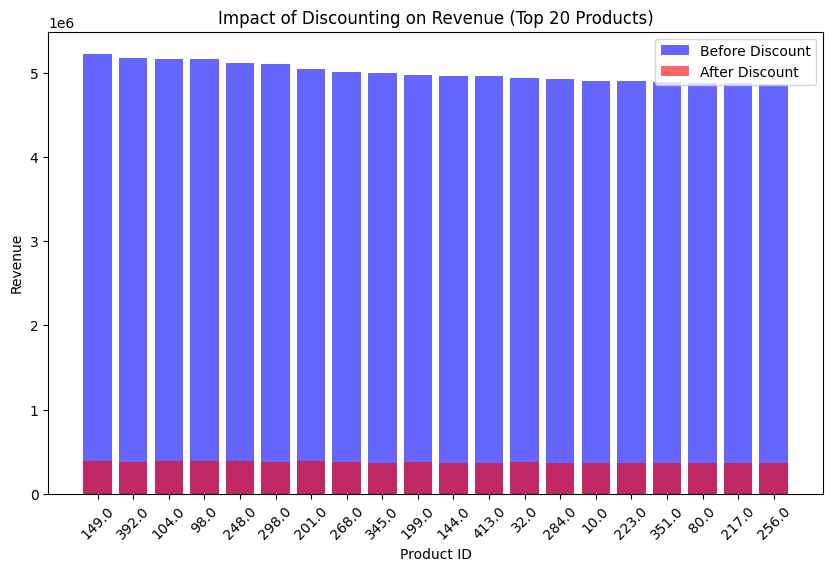

In [ ]:
# How discounting affect total sales and revenue.

# Aggregated revenue before and after discount
top_products = merged_sales.groupby("ProductID")[["before_d_Price", "TotalPrice"]].sum().reset_index()

top_products = top_products.sort_values(by="before_d_Price", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_products["ProductID"].astype(str), top_products["before_d_Price"], label="Before Discount", color="blue", alpha=0.6)
plt.bar(top_products["ProductID"].astype(str), top_products["TotalPrice"], label="After Discount", color="red", alpha=0.6)
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.title("Impact of Discounting on Revenue (Top 20 Products)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


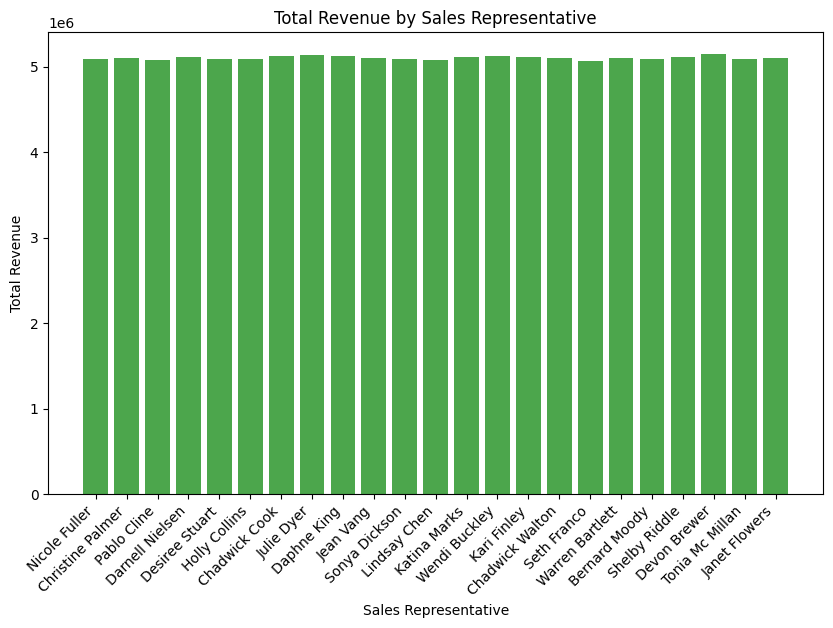

In [12]:
# sales representatives generating highest revenue.

sales_by_rep = merged_sales.groupby("SalesPersonID")["TotalPrice"].sum().reset_index()
sales_by_rep

# Merge with employees to get salesperson names
sales_by_rep = sales_by_rep.merge(dataframes['employees'], left_on="SalesPersonID", right_on="EmployeeID", how="left")

# Plot total revenue per salesperson
plt.figure(figsize=(10, 6))
plt.bar(sales_by_rep["FirstName"] + " " + sales_by_rep["LastName"], sales_by_rep["TotalPrice"], color="green", alpha=0.7)
plt.xlabel("Sales Representative")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Sales Representative")
plt.xticks(rotation=45, ha='right')
plt.show()

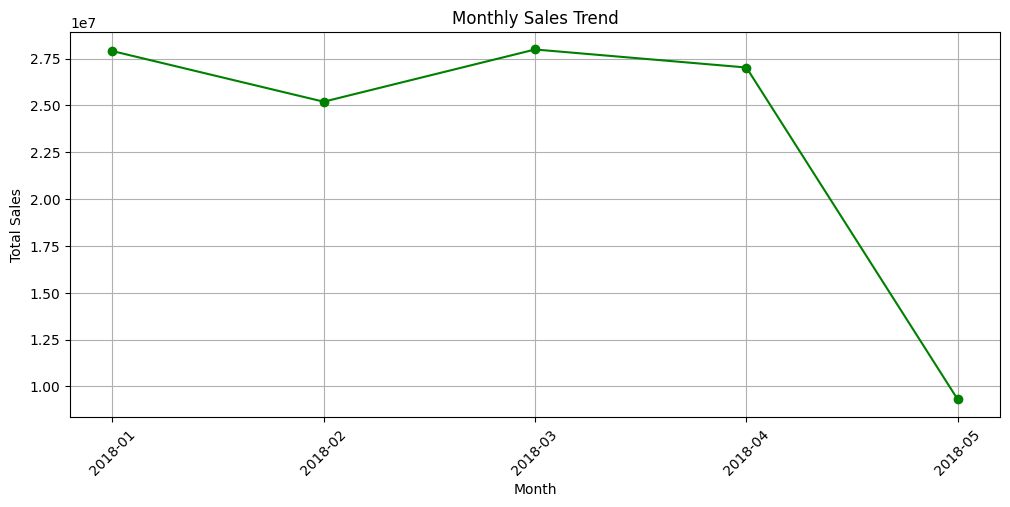

In [13]:
# Trend of sales over time(monthly)

# Sales Date to DateTime Format
merged_sales["SalesDate"] = pd.to_datetime(merged_sales["SalesDate"])

# Extract Month for Aggregation
merged_sales["Month"] = merged_sales["SalesDate"].dt.to_period("M")

# monthly trends
monthly_sales = merged_sales.groupby("Month")["TotalPrice"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)  # Convert period to string

# trends visual
# Monthly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Month"], monthly_sales["TotalPrice"], marker="o", linestyle="-", color="green")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


2. Customer Insights



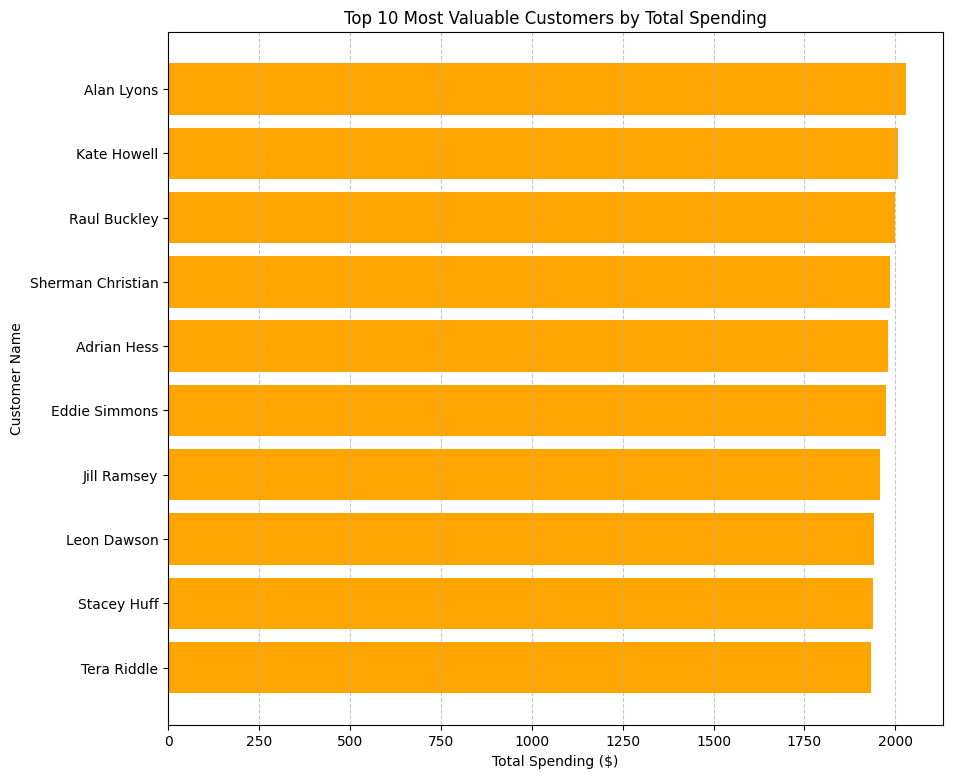

In [ ]:
# Customer Insights

# The most valuable customers based on total spending.

# agg
customer_spending = merged_sales.groupby("CustomerID")["TotalPrice"].sum().reset_index()

customer_spending = customer_spending.merge(
    dataframes["customers"][["CustomerID", "FirstName", "LastName"]],
    on="CustomerID",
    how="left"
)

# sort
customer_spending = customer_spending.sort_values(by="TotalPrice", ascending=False)

top_customers = customer_spending.head(10)

# Plot
plt.figure(figsize=(10, 9))
plt.barh(top_customers["FirstName"] + " " + top_customers["LastName"], top_customers["TotalPrice"], color="orange")
plt.xlabel("Total Spending ($)")
plt.ylabel("Customer Name")
plt.title("Top 10 Most Valuable Customers by Total Spending")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



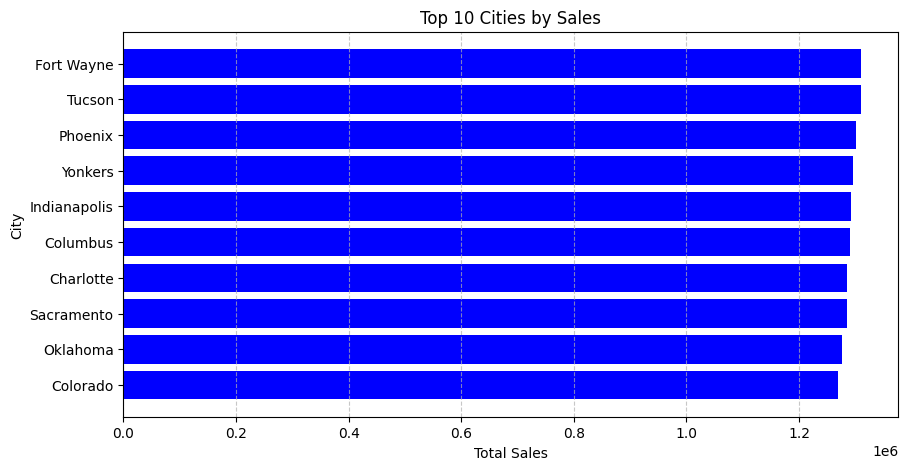

In [20]:
# How sales vary across different customer locations

# Grouped by CustomerID to get total sales per customer
sales_by_customer = merged_sales.groupby("CustomerID")["TotalPrice"].sum().reset_index()

# Merged with customer details to get CityID
sales_by_customer = sales_by_customer.merge(
    dataframes["customers"][["CustomerID", "CityID"]],
    on="CustomerID",
    how="left"
)

# Merged with cities to get CityName
sales_by_customer = sales_by_customer.merge(
    dataframes["cities"][["CityID", "CityName"]],
    on="CityID",
    how="left"
)

# Sum total sales by City
sales_by_city = sales_by_customer.groupby("CityName")["TotalPrice"].sum().reset_index()

# top 10 cities by sales
sales_by_city = sales_by_city.sort_values(by="TotalPrice", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(sales_by_city["CityName"], sales_by_city["TotalPrice"], color="blue")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.title("Top 10 Cities by Sales")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


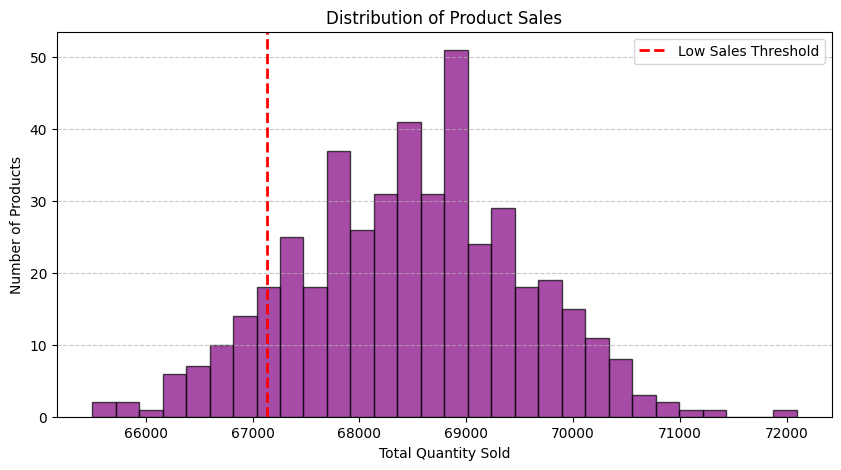

In [16]:
# Product Performance

# products with consistently low sales. Should they be discontinued?

product_sales = merged_sales.groupby("ProductID")["Quantity"].sum().reset_index()

product_sales = product_sales.merge(
    dataframes["products"][["ProductID", "ProductName"]],
    on="ProductID",
    how="left"
)

# 10th percentile threshold
low_sales_threshold = np.percentile(product_sales["Quantity"], 10)

# Filter products below the threshold
low_selling_products = product_sales[product_sales["Quantity"] <= low_sales_threshold]

# low-selling products
low_selling_products.sort_values(by="Quantity", ascending=True)

# plot
plt.figure(figsize=(10, 5))
plt.hist(product_sales["Quantity"], bins=30, color="purple", alpha=0.7, edgecolor="black")
plt.axvline(low_sales_threshold, color="red", linestyle="dashed", linewidth=2, label="Low Sales Threshold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Sales")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Correlation between tenure and sales: -0.44


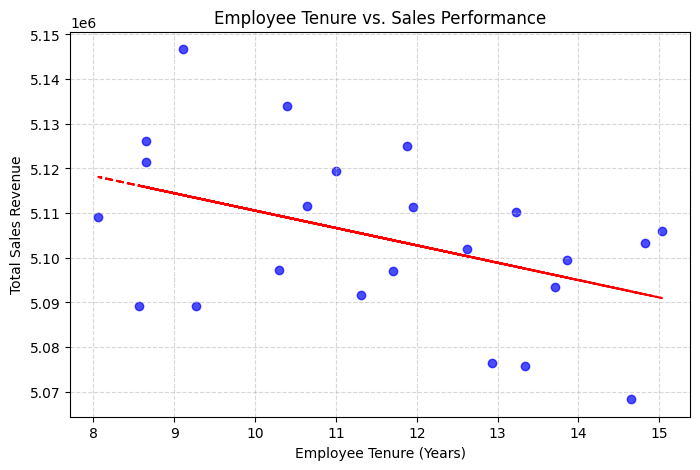

In [17]:
# Employee Analysis

# correlation between employees

sales_by_employee = merged_sales.groupby("SalesPersonID")["TotalPrice"].sum().reset_index()

# Merge sales data with employee details
sales_by_employee = sales_by_employee.merge(
    dataframes["employees"][["EmployeeID", "HireDate"]],
    left_on="SalesPersonID",
    right_on="EmployeeID",
    how="left"
)

# HireDate to datetime
sales_by_employee["HireDate"] = pd.to_datetime(sales_by_employee["HireDate"])

# tenure (years since hire date)
sales_by_employee["Tenure"] = (pd.to_datetime("today") - sales_by_employee["HireDate"]).dt.days / 365

# correlation between tenure and sales
correlation = sales_by_employee["Tenure"].corr(sales_by_employee["TotalPrice"])
print(f"Correlation between tenure and sales: {correlation:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(sales_by_employee["Tenure"], sales_by_employee["TotalPrice"], color="blue", alpha=0.7)
plt.xlabel("Employee Tenure (Years)")
plt.ylabel("Total Sales Revenue")
plt.title("Employee Tenure vs. Sales Performance")
plt.grid(True, linestyle="--", alpha=0.5)

# Best-fit trend line
m, b = np.polyfit(sales_by_employee["Tenure"], sales_by_employee["TotalPrice"], 1)
plt.plot(sales_by_employee["Tenure"], m*sales_by_employee["Tenure"] + b, color="red", linestyle="dashed")

plt.show()

